# Configurações Básicas e Importando Bibliotecas

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [67]:
dfMG = pd.read_csv("./Data/DadosMG/DadosPT_MG.csv", sep=";", encoding="utf-8")
dfDiam = pd.read_csv("./Data/Diamantina/DadosPT_Diam.csv", sep=";", encoding="utf-8")
dfJan = pd.read_csv("./Data/Janauba/DadosPT_Janauba.csv", sep=";", encoding="utf-8")
dfTO = pd.read_csv("./Data/Teofilo Otoni/DadosPT_TO.csv", sep=";", encoding="utf-8")
dfUnai = pd.read_csv("./Data/Unai/DadosPT_Unai.csv", sep=";", encoding="utf-8")

# Analisando Demografia dos Candidatos

## Minas Gerais

In [68]:
print("Total de Candidatos Completistas Português MG (sem nota 0): ")
dfMG["NU_NOTA_LC"].count()

Total de Candidatos Completistas Português MG (sem nota 0): 


88331

### Cor

In [69]:
cores = ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena', 'Não dispõe']

def converterCor(num):
    return cores[num]

dfMG['TP_COR_RACA'] = dfMG['TP_COR_RACA'].map(converterCor)

In [70]:
dfMG["TP_COR_RACA"].value_counts(normalize=True)

TP_COR_RACA
Branca           0.459643
Parda            0.391346
Preta            0.125298
Amarela          0.011358
Não declarado    0.009540
Indígena         0.002814
Name: proportion, dtype: float64

### Sexo

In [71]:
dfMG["TP_SEXO"].value_counts(normalize=True)

TP_SEXO
F    0.608873
M    0.391127
Name: proportion, dtype: float64

### Dependência Administrativa

In [72]:
deps_admins = [" ","Federal", "Estadual", "Municipal", "Privada"]

def converterDepAdmin(num):
    return deps_admins[int(num)]

dfMG['TP_DEPENDENCIA_ADM_ESC'] = dfMG['TP_DEPENDENCIA_ADM_ESC'].map(converterDepAdmin, na_action="ignore")

In [73]:
dfMG["TP_DEPENDENCIA_ADM_ESC"].value_counts(normalize=True)

TP_DEPENDENCIA_ADM_ESC
Estadual     0.614542
Privada      0.285776
Federal      0.090333
Municipal    0.009349
Name: proportion, dtype: float64

### Escolaridade da Mãe

In [74]:
escolaridades = ["Nunca estudou",
"Não completou a 4ª série/5º ano do Ensino Fundamental",
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",
"Completou o Ensino Médio, mas não completou a Faculdade",
"Completou a Faculdade, mas não completou a Pós-graduação",
"Completou a Pós-graduação",
"Não sei"]

def convEscString(letra):
    letras = ["A","B","C","D","E","F","G","H"]
    indice = letras.index(letra)
    return escolaridades[indice]

dfMG["Q002"] = dfMG["Q002"].apply(convEscString)

In [75]:
dfMG["Q002"].value_counts(normalize=True)

Q002
Completou o Ensino Médio, mas não completou a Faculdade                                   0.365806
Completou a Pós-graduação                                                                 0.133778
Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio       0.127573
Completou a Faculdade, mas não completou a Pós-graduação                                  0.123635
Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental    0.112871
Não completou a 4ª série/5º ano do Ensino Fundamental                                     0.090099
Não sei                                                                                   0.036131
Nunca estudou                                                                             0.010106
Name: proportion, dtype: float64

### Renda

In [76]:
rendas = ["Nenhuma Renda",
"Até R$ 1.320,00",
"De R$ 1.320,01 até R$ 1.980,00.",
"De R$ 1.980,01 até R$ 2.640,00.",
"De R$ 2.640,01 até R$ 3.300,00.",
"De R$ 3.300,01 até R$ 3.960,00.",
"De R$ 3.960,01 até R$ 5.280,00.",
"De R$ 5.280,01 até R$ 6.600,00.",
"De R$ 6.600,01 até R$ 7.920,00.",
"De R$ 7.920,01 até R$ 9240,00.",
"De R$ 9.240,01 até R$ 10.560,00.",
"De R$ 10.560,01 até R$ 11.880,00.",
"De R$ 11.880,01 até R$ 13.200,00.",
"De R$ 13.200,01 até R$ 15.840,00.",
"De R$ 15.840,01 até R$19.800,00.",
"De R$ 19.800,01 até R$ 26.400,00.",
"Acima de R$ 26.400,00."]

def convRenda(letra):
    letras = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q"]
    indice = letras.index(letra)
    return rendas[indice]

dfMG["Q006"] = dfMG["Q006"].apply(convRenda)

In [77]:
dfMG["Q006"].value_counts(normalize=True)

Q006
Até R$ 1.320,00                      0.237666
De R$ 1.320,01 até R$ 1.980,00.      0.178170
De R$ 1.980,01 até R$ 2.640,00.      0.139142
De R$ 2.640,01 até R$ 3.300,00.      0.098479
De R$ 3.960,01 até R$ 5.280,00.      0.081053
De R$ 3.300,01 até R$ 3.960,00.      0.057340
De R$ 5.280,01 até R$ 6.600,00.      0.041988
Nenhuma Renda                        0.030986
De R$ 6.600,01 até R$ 7.920,00.      0.025979
De R$ 7.920,01 até R$ 9240,00.       0.021867
De R$ 9.240,01 até R$ 10.560,00.     0.017481
Acima de R$ 26.400,00.               0.014611
De R$ 15.840,01 até R$19.800,00.     0.011742
De R$ 13.200,01 até R$ 15.840,00.    0.011651
De R$ 10.560,01 até R$ 11.880,00.    0.011632
De R$ 19.800,01 até R$ 26.400,00.    0.010810
De R$ 11.880,01 até R$ 13.200,00.    0.009403
Name: proportion, dtype: float64

## Diamantina

In [78]:
print("Total de Candidatos Completistas Português Diamantina (sem nota 0): ")
dfDiam["NU_NOTA_LC"].count()

Total de Candidatos Completistas Português Diamantina (sem nota 0): 


572

### Cor

In [79]:
cores = ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena', 'Não dispõe']

def converterCor(num):
    return cores[num]

dfDiam['TP_COR_RACA'] = dfDiam['TP_COR_RACA'].map(converterCor)

In [80]:
dfDiam["TP_COR_RACA"].value_counts(normalize=True)

TP_COR_RACA
Parda            0.543027
Branca           0.249258
Preta            0.183976
Amarela          0.014837
Não declarado    0.007418
Indígena         0.001484
Name: proportion, dtype: float64

### Sexo

In [81]:
dfDiam["TP_SEXO"].value_counts(normalize=True)

TP_SEXO
F    0.626113
M    0.373887
Name: proportion, dtype: float64

### Dependência Administrativa

In [82]:
deps_admins = [" ","Federal", "Estadual", "Municipal", "Privada"]

def converterDepAdmin(num):
    return deps_admins[int(num)]

dfDiam['TP_DEPENDENCIA_ADM_ESC'] = dfDiam['TP_DEPENDENCIA_ADM_ESC'].map(converterDepAdmin, na_action="ignore")

In [83]:
dfDiam["TP_DEPENDENCIA_ADM_ESC"].value_counts(normalize=True)

TP_DEPENDENCIA_ADM_ESC
Estadual    0.710227
Federal     0.210227
Privada     0.079545
Name: proportion, dtype: float64

### Escolaridade da Mãe

In [84]:
escolaridades = ["Nunca estudou",
"Não completou a 4ª série/5º ano do Ensino Fundamental",
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",
"Completou o Ensino Médio, mas não completou a Faculdade",
"Completou a Faculdade, mas não completou a Pós-graduação",
"Completou a Pós-graduação",
"Não sei"]

def convEscString(letra):
    letras = ["A","B","C","D","E","F","G","H"]
    indice = letras.index(letra)
    return escolaridades[indice]

dfDiam["Q002"] = dfDiam["Q002"].apply(convEscString)

In [85]:
dfDiam["Q002"].value_counts(normalize=True)

Q002
Completou o Ensino Médio, mas não completou a Faculdade                                   0.302671
Completou a Pós-graduação                                                                 0.145401
Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental    0.137982
Completou a Faculdade, mas não completou a Pós-graduação                                  0.121662
Não completou a 4ª série/5º ano do Ensino Fundamental                                     0.117211
Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio       0.112760
Não sei                                                                                   0.038576
Nunca estudou                                                                             0.023739
Name: proportion, dtype: float64

### Renda

In [86]:
rendas = ["Nenhuma Renda",
"Até R$ 1.320,00",
"De R$ 1.320,01 até R$ 1.980,00.",
"De R$ 1.980,01 até R$ 2.640,00.",
"De R$ 2.640,01 até R$ 3.300,00.",
"De R$ 3.300,01 até R$ 3.960,00.",
"De R$ 3.960,01 até R$ 5.280,00.",
"De R$ 5.280,01 até R$ 6.600,00.",
"De R$ 6.600,01 até R$ 7.920,00.",
"De R$ 7.920,01 até R$ 9240,00.",
"De R$ 9.240,01 até R$ 10.560,00.",
"De R$ 10.560,01 até R$ 11.880,00.",
"De R$ 11.880,01 até R$ 13.200,00.",
"De R$ 13.200,01 até R$ 15.840,00.",
"De R$ 15.840,01 até R$19.800,00.",
"De R$ 19.800,01 até R$ 26.400,00.",
"Acima de R$ 26.400,00."]

def convRenda(letra):
    letras = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q"]
    indice = letras.index(letra)
    return rendas[indice]

dfDiam["Q006"] = dfDiam["Q006"].apply(convRenda)

In [87]:
dfDiam["Q006"].value_counts(normalize=True)

Q006
Até R$ 1.320,00                      0.410979
De R$ 1.320,01 até R$ 1.980,00.      0.178042
De R$ 1.980,01 até R$ 2.640,00.      0.090504
De R$ 2.640,01 até R$ 3.300,00.      0.066766
Nenhuma Renda                        0.056380
De R$ 3.960,01 até R$ 5.280,00.      0.047478
De R$ 3.300,01 até R$ 3.960,00.      0.043027
De R$ 5.280,01 até R$ 6.600,00.      0.019288
De R$ 9.240,01 até R$ 10.560,00.     0.016320
De R$ 6.600,01 até R$ 7.920,00.      0.013353
De R$ 13.200,01 até R$ 15.840,00.    0.013353
De R$ 7.920,01 até R$ 9240,00.       0.011869
De R$ 19.800,01 até R$ 26.400,00.    0.011869
De R$ 15.840,01 até R$19.800,00.     0.007418
De R$ 11.880,01 até R$ 13.200,00.    0.007418
De R$ 10.560,01 até R$ 11.880,00.    0.005935
Name: proportion, dtype: float64

## Janaúba

In [88]:
print("Total de Candidatos Completistas Português Janaúba (sem nota 0): ")
dfJan["NU_NOTA_LC"].count()

Total de Candidatos Completistas Português Janaúba (sem nota 0): 


475

### Cor

In [89]:
cores = ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena', 'Não dispõe']

def converterCor(num):
    return cores[num]

dfJan['TP_COR_RACA'] = dfJan['TP_COR_RACA'].map(converterCor)

In [90]:
dfJan["TP_COR_RACA"].value_counts(normalize=True)

TP_COR_RACA
Parda            0.495591
Branca           0.243386
Preta            0.227513
Amarela          0.015873
Não declarado    0.012346
Indígena         0.005291
Name: proportion, dtype: float64

### Sexo

In [91]:
dfJan["TP_SEXO"].value_counts(normalize=True)

TP_SEXO
F    0.604938
M    0.395062
Name: proportion, dtype: float64

### Dependência Administrativa

In [92]:
deps_admins = [" ","Federal", "Estadual", "Municipal", "Privada"]

def converterDepAdmin(num):
    return deps_admins[int(num)]

dfJan['TP_DEPENDENCIA_ADM_ESC'] = dfJan['TP_DEPENDENCIA_ADM_ESC'].map(converterDepAdmin, na_action="ignore")

In [93]:
dfJan["TP_DEPENDENCIA_ADM_ESC"].value_counts(normalize=True)

TP_DEPENDENCIA_ADM_ESC
Estadual    0.481884
Privada     0.311594
Federal     0.206522
Name: proportion, dtype: float64

### Escolaridade da Mãe

In [94]:
escolaridades = ["Nunca estudou",
"Não completou a 4ª série/5º ano do Ensino Fundamental",
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",
"Completou o Ensino Médio, mas não completou a Faculdade",
"Completou a Faculdade, mas não completou a Pós-graduação",
"Completou a Pós-graduação",
"Não sei"]

def convEscString(letra):
    letras = ["A","B","C","D","E","F","G","H"]
    indice = letras.index(letra)
    return escolaridades[indice]

dfJan["Q002"] = dfJan["Q002"].apply(convEscString)

In [95]:
dfJan["Q002"].value_counts(normalize=True)

Q002
Completou o Ensino Médio, mas não completou a Faculdade                                   0.368607
Completou a Faculdade, mas não completou a Pós-graduação                                  0.139330
Completou a Pós-graduação                                                                 0.123457
Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental    0.107584
Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio       0.102293
Não completou a 4ª série/5º ano do Ensino Fundamental                                     0.097002
Não sei                                                                                   0.042328
Nunca estudou                                                                             0.019400
Name: proportion, dtype: float64

### Renda

In [96]:
rendas = ["Nenhuma Renda",
"Até R$ 1.320,00",
"De R$ 1.320,01 até R$ 1.980,00.",
"De R$ 1.980,01 até R$ 2.640,00.",
"De R$ 2.640,01 até R$ 3.300,00.",
"De R$ 3.300,01 até R$ 3.960,00.",
"De R$ 3.960,01 até R$ 5.280,00.",
"De R$ 5.280,01 até R$ 6.600,00.",
"De R$ 6.600,01 até R$ 7.920,00.",
"De R$ 7.920,01 até R$ 9240,00.",
"De R$ 9.240,01 até R$ 10.560,00.",
"De R$ 10.560,01 até R$ 11.880,00.",
"De R$ 11.880,01 até R$ 13.200,00.",
"De R$ 13.200,01 até R$ 15.840,00.",
"De R$ 15.840,01 até R$19.800,00.",
"De R$ 19.800,01 até R$ 26.400,00.",
"Acima de R$ 26.400,00."]

def convRenda(letra):
    letras = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q"]
    indice = letras.index(letra)
    return rendas[indice]

dfJan["Q006"] = dfJan["Q006"].apply(convRenda)

In [97]:
dfJan["Q006"].value_counts(normalize=True)

Q006
Até R$ 1.320,00                      0.405644
De R$ 1.320,01 até R$ 1.980,00.      0.181658
De R$ 1.980,01 até R$ 2.640,00.      0.102293
De R$ 3.960,01 até R$ 5.280,00.      0.067019
Nenhuma Renda                        0.054674
De R$ 2.640,01 até R$ 3.300,00.      0.052910
De R$ 3.300,01 até R$ 3.960,00.      0.028219
De R$ 5.280,01 até R$ 6.600,00.      0.024691
De R$ 6.600,01 até R$ 7.920,00.      0.022928
De R$ 9.240,01 até R$ 10.560,00.     0.017637
De R$ 7.920,01 até R$ 9240,00.       0.010582
De R$ 10.560,01 até R$ 11.880,00.    0.008818
De R$ 11.880,01 até R$ 13.200,00.    0.007055
De R$ 13.200,01 até R$ 15.840,00.    0.007055
De R$ 15.840,01 até R$19.800,00.     0.005291
De R$ 19.800,01 até R$ 26.400,00.    0.003527
Name: proportion, dtype: float64

## Teófilo Otoni

In [98]:
print("Total de Candidatos Completistas Português Teófilo Otoni (sem nota 0): ")
dfTO["NU_NOTA_LC"].count()

Total de Candidatos Completistas Português Teófilo Otoni (sem nota 0): 


873

### Cor

In [99]:
cores = ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena', 'Não dispõe']

def converterCor(num):
    return cores[num]

dfTO['TP_COR_RACA'] = dfTO['TP_COR_RACA'].map(converterCor)

In [100]:
dfTO["TP_COR_RACA"].value_counts(normalize=True)

TP_COR_RACA
Parda            0.545455
Branca           0.266608
Preta            0.155594
Amarela          0.015734
Não declarado    0.011364
Indígena         0.005245
Name: proportion, dtype: float64

### Sexo

In [101]:
dfTO["TP_SEXO"].value_counts(normalize=True)

TP_SEXO
F    0.625874
M    0.374126
Name: proportion, dtype: float64

### Dependência Administrativa

In [102]:
deps_admins = [" ","Federal", "Estadual", "Municipal", "Privada"]

def converterDepAdmin(num):
    return deps_admins[int(num)]

dfTO['TP_DEPENDENCIA_ADM_ESC'] = dfTO['TP_DEPENDENCIA_ADM_ESC'].map(converterDepAdmin, na_action="ignore")

In [103]:
dfTO["TP_DEPENDENCIA_ADM_ESC"].value_counts(normalize=True)

TP_DEPENDENCIA_ADM_ESC
Estadual    0.735099
Federal     0.134106
Privada     0.130795
Name: proportion, dtype: float64

### Escolaridade da Mãe

In [104]:
escolaridades = ["Nunca estudou",
"Não completou a 4ª série/5º ano do Ensino Fundamental",
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",
"Completou o Ensino Médio, mas não completou a Faculdade",
"Completou a Faculdade, mas não completou a Pós-graduação",
"Completou a Pós-graduação",
"Não sei"]

def convEscString(letra):
    letras = ["A","B","C","D","E","F","G","H"]
    indice = letras.index(letra)
    return escolaridades[indice]

dfTO["Q002"] = dfTO["Q002"].apply(convEscString)

In [105]:
dfTO["Q002"].value_counts(normalize=True)

Q002
Completou o Ensino Médio, mas não completou a Faculdade                                   0.363636
Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio       0.134615
Completou a Faculdade, mas não completou a Pós-graduação                                  0.128497
Completou a Pós-graduação                                                                 0.115385
Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental    0.105769
Não completou a 4ª série/5º ano do Ensino Fundamental                                     0.097902
Não sei                                                                                   0.036713
Nunca estudou                                                                             0.017483
Name: proportion, dtype: float64

### Renda

In [106]:
rendas = ["Nenhuma Renda",
"Até R$ 1.320,00",
"De R$ 1.320,01 até R$ 1.980,00.",
"De R$ 1.980,01 até R$ 2.640,00.",
"De R$ 2.640,01 até R$ 3.300,00.",
"De R$ 3.300,01 até R$ 3.960,00.",
"De R$ 3.960,01 até R$ 5.280,00.",
"De R$ 5.280,01 até R$ 6.600,00.",
"De R$ 6.600,01 até R$ 7.920,00.",
"De R$ 7.920,01 até R$ 9240,00.",
"De R$ 9.240,01 até R$ 10.560,00.",
"De R$ 10.560,01 até R$ 11.880,00.",
"De R$ 11.880,01 até R$ 13.200,00.",
"De R$ 13.200,01 até R$ 15.840,00.",
"De R$ 15.840,01 até R$19.800,00.",
"De R$ 19.800,01 até R$ 26.400,00.",
"Acima de R$ 26.400,00."]

def convRenda(letra):
    letras = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q"]
    indice = letras.index(letra)
    return rendas[indice]

dfTO["Q006"] = dfTO["Q006"].apply(convRenda)

In [107]:
dfTO["Q006"].value_counts(normalize=True)

Q006
Até R$ 1.320,00                      0.374126
De R$ 1.320,01 até R$ 1.980,00.      0.161713
De R$ 1.980,01 até R$ 2.640,00.      0.111014
Nenhuma Renda                        0.081294
De R$ 2.640,01 até R$ 3.300,00.      0.068182
De R$ 3.960,01 até R$ 5.280,00.      0.056818
De R$ 3.300,01 até R$ 3.960,00.      0.036713
De R$ 5.280,01 até R$ 6.600,00.      0.030594
De R$ 6.600,01 até R$ 7.920,00.      0.020979
De R$ 9.240,01 até R$ 10.560,00.     0.013112
De R$ 7.920,01 até R$ 9240,00.       0.011364
De R$ 10.560,01 até R$ 11.880,00.    0.009615
De R$ 11.880,01 até R$ 13.200,00.    0.007867
De R$ 13.200,01 até R$ 15.840,00.    0.006119
De R$ 15.840,01 até R$19.800,00.     0.006119
De R$ 19.800,01 até R$ 26.400,00.    0.002622
Acima de R$ 26.400,00.               0.001748
Name: proportion, dtype: float64

## Unaí

In [108]:
print("Total de Candidatos Completistas Português Unaí (sem nota 0): ")
dfUnai["NU_NOTA_LC"].count()

Total de Candidatos Completistas Português Unaí (sem nota 0): 


382

### Cor

In [109]:
cores = ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena', 'Não dispõe']

def converterCor(num):
    return cores[num]

dfUnai['TP_COR_RACA'] = dfUnai['TP_COR_RACA'].map(converterCor)

In [110]:
dfUnai["TP_COR_RACA"].value_counts(normalize=True)

TP_COR_RACA
Parda            0.457557
Branca           0.391304
Preta            0.107660
Amarela          0.026915
Não declarado    0.014493
Indígena         0.002070
Name: proportion, dtype: float64

### Sexo

In [111]:
dfUnai["TP_SEXO"].value_counts(normalize=True)

TP_SEXO
F    0.596273
M    0.403727
Name: proportion, dtype: float64

### Dependência Administrativa

In [112]:
deps_admins = [" ","Federal", "Estadual", "Municipal", "Privada"]

def converterDepAdmin(num):
    return deps_admins[int(num)]

dfUnai['TP_DEPENDENCIA_ADM_ESC'] = dfUnai['TP_DEPENDENCIA_ADM_ESC'].map(converterDepAdmin, na_action="ignore")

In [113]:
dfUnai["TP_DEPENDENCIA_ADM_ESC"].value_counts(normalize=True)

TP_DEPENDENCIA_ADM_ESC
Estadual    0.664474
Privada     0.332237
Federal     0.003289
Name: proportion, dtype: float64

### Escolaridade da Mãe

In [114]:
escolaridades = ["Nunca estudou",
"Não completou a 4ª série/5º ano do Ensino Fundamental",
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",
"Completou o Ensino Médio, mas não completou a Faculdade",
"Completou a Faculdade, mas não completou a Pós-graduação",
"Completou a Pós-graduação",
"Não sei"]

def convEscString(letra):
    letras = ["A","B","C","D","E","F","G","H"]
    indice = letras.index(letra)
    return escolaridades[indice]

dfUnai["Q002"] = dfUnai["Q002"].apply(convEscString)

In [115]:
dfUnai["Q002"].value_counts(normalize=True)

Q002
Completou o Ensino Médio, mas não completou a Faculdade                                   0.360248
Completou a Faculdade, mas não completou a Pós-graduação                                  0.159420
Completou a Pós-graduação                                                                 0.142857
Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio       0.126294
Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental    0.091097
Não completou a 4ª série/5º ano do Ensino Fundamental                                     0.080745
Não sei                                                                                   0.035197
Nunca estudou                                                                             0.004141
Name: proportion, dtype: float64

### Renda

In [116]:
rendas = ["Nenhuma Renda",
"Até R$ 1.320,00",
"De R$ 1.320,01 até R$ 1.980,00.",
"De R$ 1.980,01 até R$ 2.640,00.",
"De R$ 2.640,01 até R$ 3.300,00.",
"De R$ 3.300,01 até R$ 3.960,00.",
"De R$ 3.960,01 até R$ 5.280,00.",
"De R$ 5.280,01 até R$ 6.600,00.",
"De R$ 6.600,01 até R$ 7.920,00.",
"De R$ 7.920,01 até R$ 9240,00.",
"De R$ 9.240,01 até R$ 10.560,00.",
"De R$ 10.560,01 até R$ 11.880,00.",
"De R$ 11.880,01 até R$ 13.200,00.",
"De R$ 13.200,01 até R$ 15.840,00.",
"De R$ 15.840,01 até R$19.800,00.",
"De R$ 19.800,01 até R$ 26.400,00.",
"Acima de R$ 26.400,00."]

def convRenda(letra):
    letras = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q"]
    indice = letras.index(letra)
    return rendas[indice]

dfUnai["Q006"] = dfUnai["Q006"].apply(convRenda)

In [117]:
dfUnai["Q006"].value_counts(normalize=True)

Q006
Até R$ 1.320,00                      0.217391
De R$ 1.320,01 até R$ 1.980,00.      0.186335
De R$ 1.980,01 até R$ 2.640,00.      0.163561
De R$ 3.960,01 até R$ 5.280,00.      0.086957
De R$ 2.640,01 até R$ 3.300,00.      0.076605
De R$ 3.300,01 até R$ 3.960,00.      0.055901
De R$ 5.280,01 até R$ 6.600,00.      0.041408
De R$ 10.560,01 até R$ 11.880,00.    0.026915
De R$ 15.840,01 até R$19.800,00.     0.020704
Nenhuma Renda                        0.020704
De R$ 6.600,01 até R$ 7.920,00.      0.018634
De R$ 9.240,01 até R$ 10.560,00.     0.018634
De R$ 7.920,01 até R$ 9240,00.       0.016563
De R$ 19.800,01 até R$ 26.400,00.    0.014493
De R$ 13.200,01 até R$ 15.840,00.    0.014493
Acima de R$ 26.400,00.               0.012422
De R$ 11.880,01 até R$ 13.200,00.    0.008282
Name: proportion, dtype: float64

# Fazendo a Análise Estatística das Notas

## Análise Descritiva das Notas

### Minas Gerais

In [118]:
analise_descritivaMG = dfMG["NU_NOTA_LC"].describe()

# Criando coeficiente de variação
coef_var = dfMG["NU_NOTA_LC"].mean() / dfMG["NU_NOTA_LC"].std()
analise_descritivaMG.loc['var_coef'] = coef_var

analise_descritivaMG

count       88331.000000
mean          527.461001
std            69.734351
min           287.200000
25%           483.900000
50%           531.600000
75%           575.900000
max           768.900000
var_coef        7.563862
Name: NU_NOTA_LC, dtype: float64

### Diamantina

In [119]:
analise_descritivaDiam = dfDiam["NU_NOTA_LC"].describe()

# Criando coeficiente de variação
coef_var = dfDiam["NU_NOTA_LC"].mean() / dfDiam["NU_NOTA_LC"].std()
analise_descritivaDiam.loc['var_coef'] = coef_var

analise_descritivaDiam

count       572.000000
mean        506.456818
std          67.120667
min         310.100000
25%         461.600000
50%         512.050000
75%         554.325000
max         644.500000
var_coef      7.545468
Name: NU_NOTA_LC, dtype: float64

### Janaúba

In [120]:
analise_descritivaJan = dfJan["NU_NOTA_LC"].describe()

# Criando coeficiente de variação
coef_var = dfJan["NU_NOTA_LC"].mean() / dfJan["NU_NOTA_LC"].std()
analise_descritivaJan.loc['var_coef'] = coef_var

analise_descritivaJan

count       475.000000
mean        505.151789
std          72.235806
min         293.800000
25%         456.350000
50%         512.000000
75%         556.400000
max         711.500000
var_coef      6.993094
Name: NU_NOTA_LC, dtype: float64

### Teófilo Otoni

In [121]:
analise_descritivaTO = dfTO["NU_NOTA_LC"].describe()

# Criando coeficiente de variação
coef_var = dfTO["NU_NOTA_LC"].mean() / dfTO["NU_NOTA_LC"].std()
analise_descritivaTO.loc['var_coef'] = coef_var

analise_descritivaTO

count       873.000000
mean        512.976403
std          67.858577
min         293.400000
25%         474.000000
50%         516.800000
75%         558.700000
max         709.200000
var_coef      7.559493
Name: NU_NOTA_LC, dtype: float64

### Unaí

In [122]:
analise_descritivaUnai = dfUnai["NU_NOTA_LC"].describe()

# Criando coeficiente de variação
coef_var = dfUnai["NU_NOTA_LC"].mean() / dfUnai["NU_NOTA_LC"].std()
analise_descritivaUnai.loc['var_coef'] = coef_var

analise_descritivaUnai

count       382.000000
mean        523.867277
std          68.614180
min         303.400000
25%         481.175000
50%         529.550000
75%         575.925000
max         673.100000
var_coef      7.634971
Name: NU_NOTA_LC, dtype: float64

## Análise de distribuição das notas

### Minas Gerais

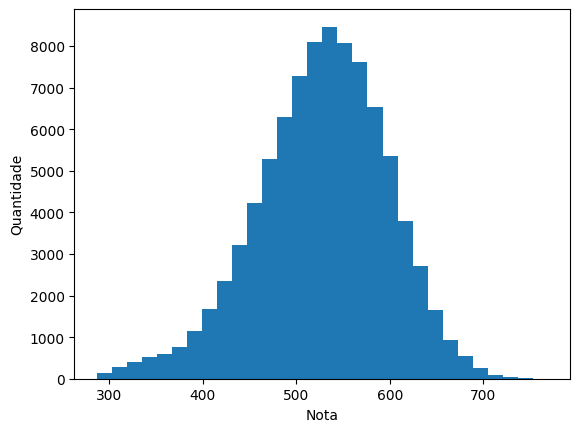

In [123]:
plt.hist(dfMG['NU_NOTA_LC'], bins=30)
plt.xlabel("Nota")
plt.ylabel("Quantidade")
plt.show()

### Diamantina

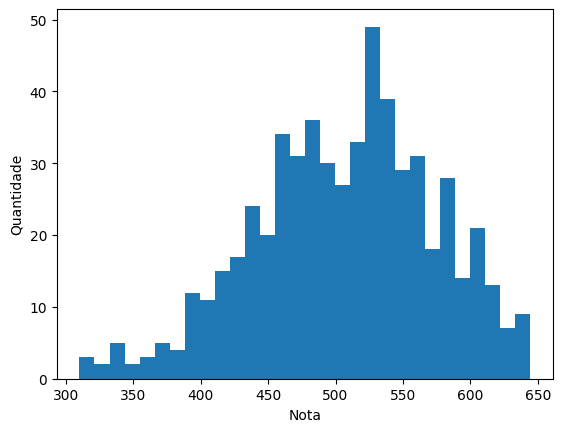

In [124]:
plt.hist(dfDiam['NU_NOTA_LC'], bins=30)
plt.xlabel("Nota")
plt.ylabel("Quantidade")
plt.show()

### Janaúba

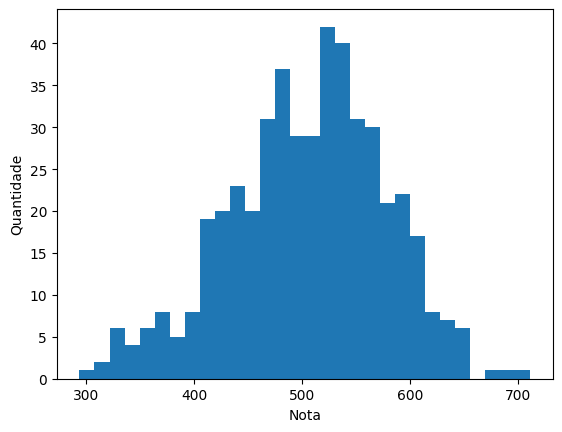

In [125]:
plt.hist(dfJan['NU_NOTA_LC'], bins=30)
plt.xlabel("Nota")
plt.ylabel("Quantidade")
plt.show()

### Teófilo Otoni

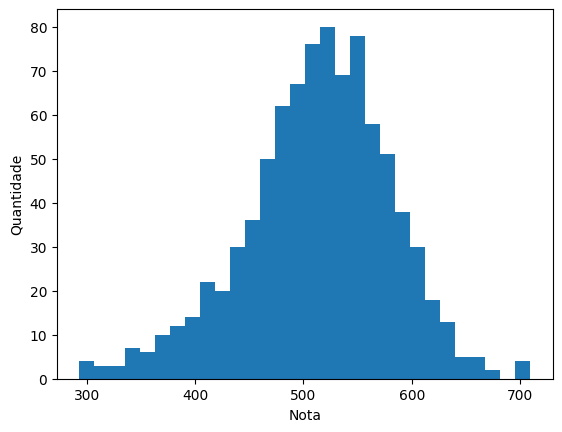

In [126]:
plt.hist(dfTO['NU_NOTA_LC'], bins=30)
plt.xlabel("Nota")
plt.ylabel("Quantidade")
plt.show()

### Unaí

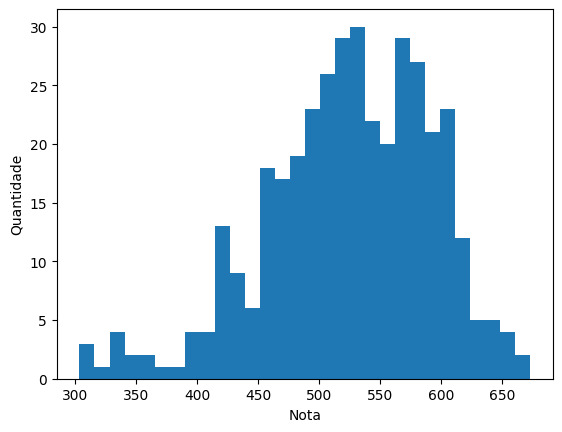

In [127]:
plt.hist(dfUnai['NU_NOTA_LC'], bins=30)
plt.xlabel("Nota")
plt.ylabel("Quantidade")
plt.show()

## Boxplots

In [128]:
dfMG = pd.read_csv("./Data/DadosMG/DadosPT_MG.csv", sep=";", encoding="utf-8")
dfDiam = pd.read_csv("./Data/Diamantina/DadosPT_Diam.csv", sep=";", encoding="utf-8")
dfJan = pd.read_csv("./Data/Janauba/DadosPT_Janauba.csv", sep=";", encoding="utf-8")
dfTO = pd.read_csv("./Data/Teofilo Otoni/DadosPT_TO.csv", sep=";", encoding="utf-8")
dfUnai = pd.read_csv("./Data/Unai/DadosPT_Unai.csv", sep=";", encoding="utf-8")

# Para fazer os boxplot, decidi carregar os bancos de dados novamente para evitar problemas
# como alteração no nome de algumas variáveis

In [129]:
# Algumas declarações de variáveis

cores = ['0 = Não declarado',
         '1 = Branca',
         '2 = Preta',
         '3 = Parda',
         '4 = Amarela',
         '5 = Indígena']

escolaridades = ["A = Nunca estudou",
"B = Não completou a 4ª série/5º ano do Ensino Fundamental",
"C = Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",
"D = Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",
"E = Completou o Ensino Médio, mas não completou a Faculdade",
"F = Completou a Faculdade, mas não completou a Pós-graduação",
"G = Completou a Pós-graduação",
"H = Não sei"]

rendas = ["A = Nenhuma Renda",
"B = Até R$ 1.320,00",
"C = De R$ 1.320,01 até R$ 1.980,00",
"D = De R$ 1.980,01 até R$ 2.640,00",
"E = De R$ 2.640,01 até R$ 3.300,00",
"F = De R$ 3.300,01 até R$ 3.960,00",
"G = De R$ 3.960,01 até R$ 5.280,00",
"H = De R$ 5.280,01 até R$ 6.600,00",
"I = De R$ 6.600,01 até R$ 7.920,00",
"J = De R$ 7.920,01 até R$ 9240,00",
"K = De R$ 9.240,01 até R$ 10.560,00",
"L = De R$ 10.560,01 até R$ 11.880,00",
"M = De R$ 11.880,01 até R$ 13.200,00",
"N = De R$ 13.200,01 até R$ 15.840,00",
"O = De R$ 15.840,01 até R$19.800,00",
"P = De R$ 19.800,01 até R$ 26.400,00",
"Q = Acima de R$ 26.400,00"]

dependencias = ["1 = Federal", "2 = Estadual", "3 = Municipal", "4 = Privada"]

dfMG["Q006"] = dfMG["Q006"].astype("category")
dfDiam["Q006"] = dfDiam["Q006"].astype("category")
dfJan["Q006"] = dfJan["Q006"].astype("category")
dfTO["Q006"] = dfTO["Q006"].astype("category")
dfUnai["Q006"] = dfUnai["Q006"].astype("category")
dfMG["Q002"] = dfMG["Q002"].astype("category")
dfDiam["Q002"] = dfDiam["Q002"].astype("category")
dfJan["Q002"] = dfJan["Q002"].astype("category")
dfTO["Q002"] = dfTO["Q002"].astype("category")
dfUnai["Q002"] = dfUnai["Q002"].astype("category")

### Minas Gerais

#### Cor

0 = Não declarado
1 = Branca
2 = Preta
3 = Parda
4 = Amarela
5 = Indígena


0          3 = Parda
1         1 = Branca
2          3 = Parda
3         1 = Branca
4          3 = Parda
             ...    
109430    1 = Branca
109431     3 = Parda
109432    1 = Branca
109433     3 = Parda
109434     3 = Parda
Name: TP_COR_RACA, Length: 109435, dtype: object

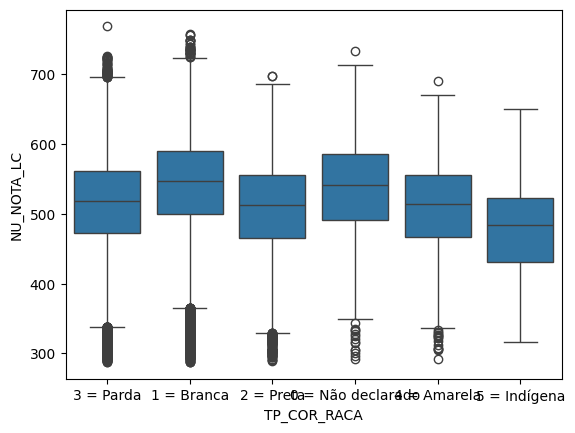

In [130]:
dfMG_CorConv = dfMG.copy()

dfMG_CorConv["TP_COR_RACA"] = dfMG["TP_COR_RACA"].map(converterCor)

sns.boxplot(x="TP_COR_RACA", y="NU_NOTA_LC", data=dfMG_CorConv)
for i in cores:
    print(i)

dfMG_CorConv["TP_COR_RACA"]

#### Sexo

In [131]:
grupoSexo = dfMG.groupby("TP_SEXO")
grupoSexo['NU_NOTA_LC'].describe()

,count,mean,std,min,25%,50%,75%,max
TP_SEXO,,,,,,,,
F,53887.0,525.394925,68.366321,287.2,482.1,528.4,572.3,758.6
M,34444.0,530.693340,71.704032,289.2,487.1,536.7,580.7,768.9


<Axes: xlabel='TP_SEXO', ylabel='NU_NOTA_LC'>

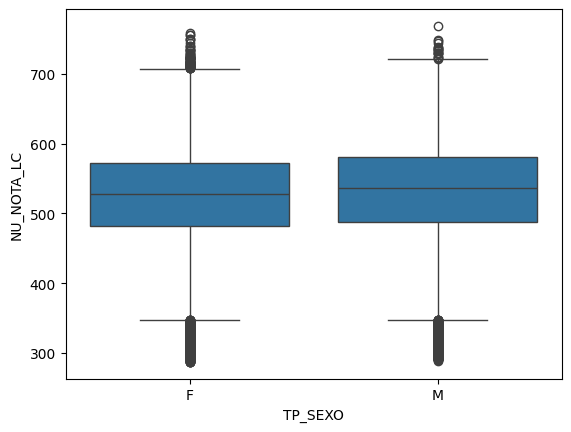

In [132]:
sns.boxplot(x="TP_SEXO", y="NU_NOTA_LC", data=dfMG)

#### Depedência Administrativa

1 = Federal
2 = Estadual
3 = Municipal
4 = Privada


<Axes: xlabel='TP_DEPENDENCIA_ADM_ESC', ylabel='NU_NOTA_LC'>

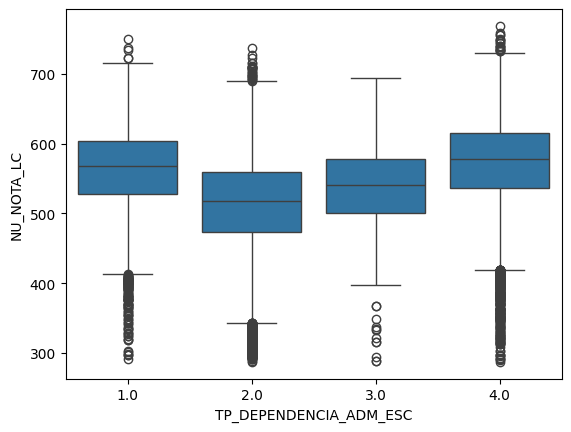

In [133]:
for i in dependencias:
    print(i)
sns.boxplot(x="TP_DEPENDENCIA_ADM_ESC", y="NU_NOTA_LC", data=dfMG)

#### Escolaridade da Mãe

A = Nunca estudou
B = Não completou a 4ª série/5º ano do Ensino Fundamental
C = Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental
D = Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio
E = Completou o Ensino Médio, mas não completou a Faculdade
F = Completou a Faculdade, mas não completou a Pós-graduação
G = Completou a Pós-graduação
H = Não sei


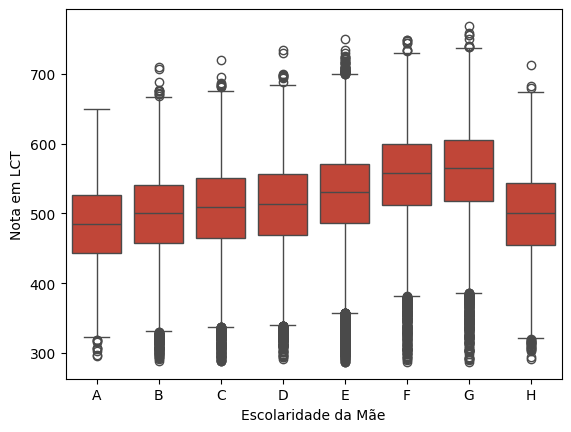

In [134]:
sns.boxplot(x="Q002", y="NU_NOTA_LC", color="#D73421", data=dfMG, order=dfMG['Q002'].cat.categories)

plt.xlabel('Escolaridade da Mãe')
plt.ylabel('Nota em LCT')

for i in escolaridades:
    print(i)

#### Renda Familiar

A = Nenhuma Renda
B = Até R$ 1.320,00
C = De R$ 1.320,01 até R$ 1.980,00
D = De R$ 1.980,01 até R$ 2.640,00
E = De R$ 2.640,01 até R$ 3.300,00
F = De R$ 3.300,01 até R$ 3.960,00
G = De R$ 3.960,01 até R$ 5.280,00
H = De R$ 5.280,01 até R$ 6.600,00
I = De R$ 6.600,01 até R$ 7.920,00
J = De R$ 7.920,01 até R$ 9240,00
K = De R$ 9.240,01 até R$ 10.560,00
L = De R$ 10.560,01 até R$ 11.880,00
M = De R$ 11.880,01 até R$ 13.200,00
N = De R$ 13.200,01 até R$ 15.840,00
O = De R$ 15.840,01 até R$19.800,00
P = De R$ 19.800,01 até R$ 26.400,00
Q = Acima de R$ 26.400,00


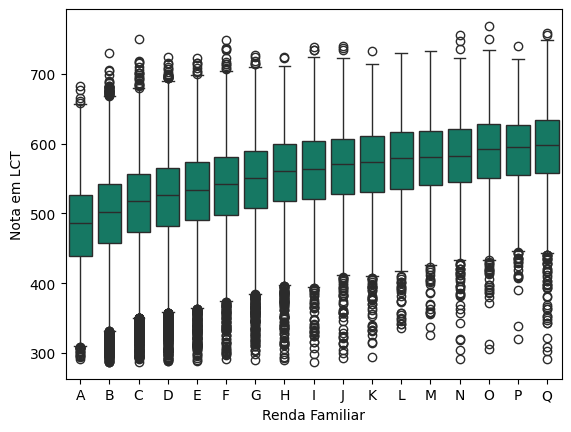

In [135]:
sns.boxplot(x="Q006", y="NU_NOTA_LC", color="#06886C", data=dfMG, order=dfMG['Q006'].cat.categories)

plt.xlabel('Renda Familiar')
plt.ylabel('Nota em LCT')

for i in rendas:
    print(i)

### Diamantina

#### Cor

0 = Não declarado
1 = Branca
2 = Preta
3 = Parda
4 = Amarela
5 = Indígena


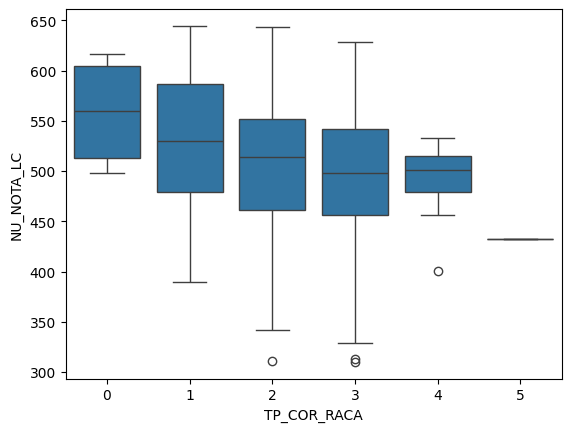

In [136]:
sns.boxplot(x="TP_COR_RACA", y="NU_NOTA_LC", data=dfDiam)
for i in cores:
    print(i)

#### Sexo

<Axes: xlabel='TP_SEXO', ylabel='NU_NOTA_LC'>

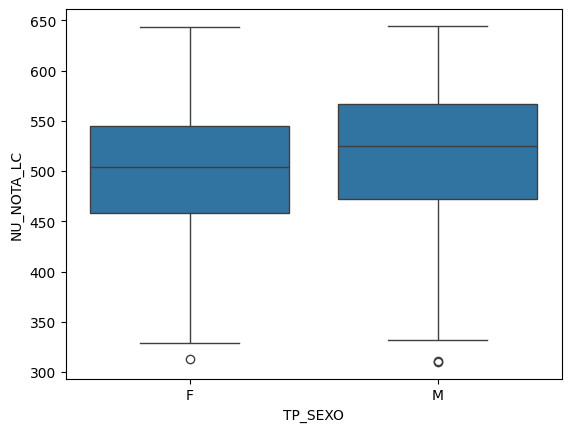

In [137]:
sns.boxplot(x="TP_SEXO", y="NU_NOTA_LC", data=dfDiam)

#### Dependência Administrativa

1 = Federal
2 = Estadual
3 = Municipal
4 = Privada


Text(0, 0.5, 'Nota em LCT')

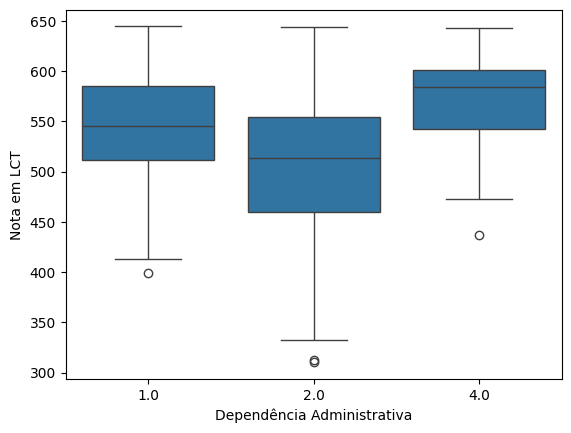

In [138]:
for i in dependencias:
    print(i)
sns.boxplot(x="TP_DEPENDENCIA_ADM_ESC", y="NU_NOTA_LC", data=dfDiam)

plt.xlabel('Dependência Administrativa')
plt.ylabel('Nota em LCT')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Estadual'),
  Text(1, 0, 'Federal'),
  Text(2, 0, 'Municipal'),
  Text(3, 0, 'Privada')])

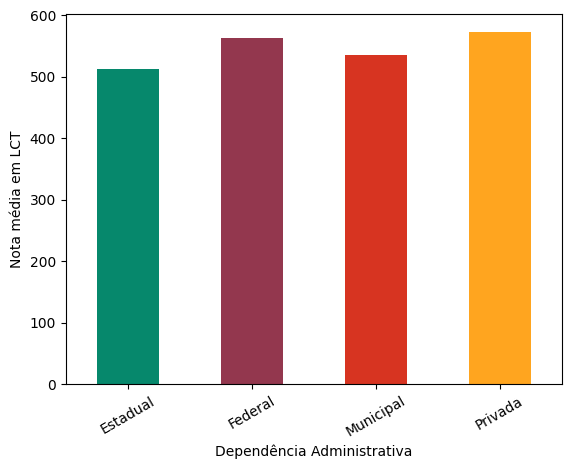

In [139]:
dic = {1: "Federal", 2: "Estadual", 3: "Municipal", 4:  "Privada"}

def converterDep(num):
    return dic[num]

dfMG_depConv = dfMG.copy()
dfMG_depConv['TP_DEPENDENCIA_ADM_ESC'] = dfMG_depConv['TP_DEPENDENCIA_ADM_ESC'].map(converterDep, na_action='ignore')

grupoDep = dfMG_depConv.groupby("TP_DEPENDENCIA_ADM_ESC")
grupoDep['NU_NOTA_LC'].mean().plot.bar(xlabel="Dependência Administrativa",ylabel="Nota média em LCT", color=["#06886C", "#93374E", "#D73421", "#FFA51F"])
plt.xticks(rotation=30)

#### Escolaridade da Mãe

A = Nunca estudou
B = Não completou a 4ª série/5º ano do Ensino Fundamental
C = Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental
D = Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio
E = Completou o Ensino Médio, mas não completou a Faculdade
F = Completou a Faculdade, mas não completou a Pós-graduação
G = Completou a Pós-graduação
H = Não sei


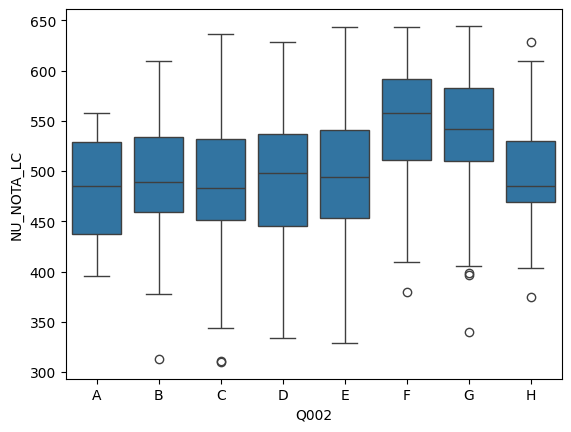

In [140]:
sns.boxplot(x="Q002", y="NU_NOTA_LC", data=dfDiam, order=dfDiam['Q002'].cat.categories)

for i in escolaridades:
    print(i)

#### Renda Familiar

A = Nenhuma Renda
B = Até R$ 1.320,00
C = De R$ 1.320,01 até R$ 1.980,00
D = De R$ 1.980,01 até R$ 2.640,00
E = De R$ 2.640,01 até R$ 3.300,00
F = De R$ 3.300,01 até R$ 3.960,00
G = De R$ 3.960,01 até R$ 5.280,00
H = De R$ 5.280,01 até R$ 6.600,00
I = De R$ 6.600,01 até R$ 7.920,00
J = De R$ 7.920,01 até R$ 9240,00
K = De R$ 9.240,01 até R$ 10.560,00
L = De R$ 10.560,01 até R$ 11.880,00
M = De R$ 11.880,01 até R$ 13.200,00
N = De R$ 13.200,01 até R$ 15.840,00
O = De R$ 15.840,01 até R$19.800,00
P = De R$ 19.800,01 até R$ 26.400,00
Q = Acima de R$ 26.400,00


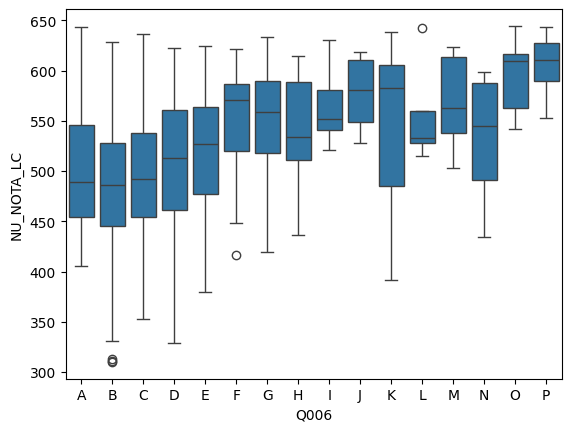

In [141]:
sns.boxplot(x="Q006", y="NU_NOTA_LC", data=dfDiam, order=dfDiam['Q006'].cat.categories)

for i in rendas:
    print(i)

### Janaúba

#### Cor

0 = Não declarado
1 = Branca
2 = Preta
3 = Parda
4 = Amarela
5 = Indígena


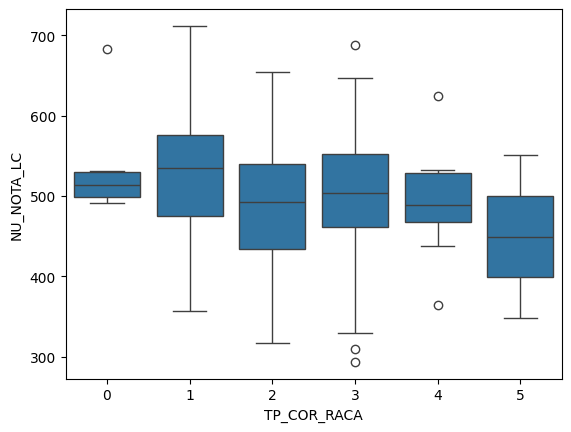

In [142]:
sns.boxplot(x="TP_COR_RACA", y="NU_NOTA_LC", data=dfJan)
for i in cores:
    print(i)

#### Sexo

<Axes: xlabel='TP_SEXO', ylabel='NU_NOTA_LC'>

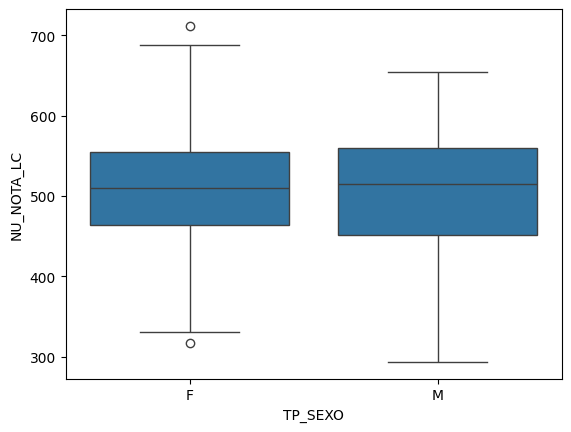

In [143]:
sns.boxplot(x="TP_SEXO", y="NU_NOTA_LC", data=dfJan)

#### Dependência Administrativa

1 = Federal
2 = Estadual
3 = Municipal
4 = Privada


<Axes: xlabel='TP_DEPENDENCIA_ADM_ESC', ylabel='NU_NOTA_LC'>

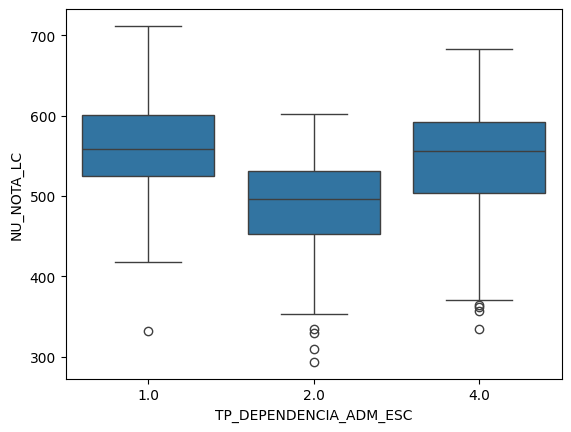

In [144]:
for i in dependencias:
    print(i)
sns.boxplot(x="TP_DEPENDENCIA_ADM_ESC", y="NU_NOTA_LC", data=dfJan)

#### Escolaridade da Mãe

A = Nunca estudou
B = Não completou a 4ª série/5º ano do Ensino Fundamental
C = Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental
D = Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio
E = Completou o Ensino Médio, mas não completou a Faculdade
F = Completou a Faculdade, mas não completou a Pós-graduação
G = Completou a Pós-graduação
H = Não sei


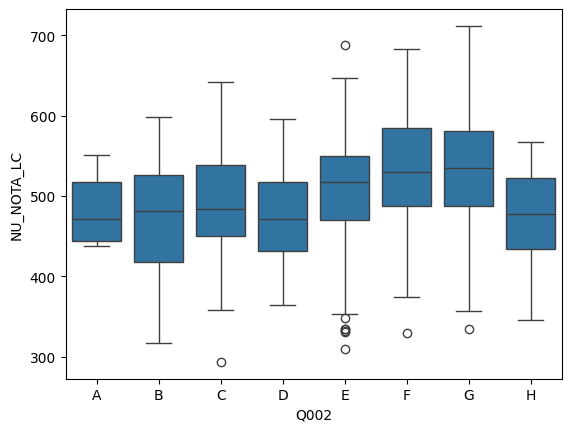

In [145]:
sns.boxplot(x="Q002", y="NU_NOTA_LC", data=dfJan, order=dfJan['Q002'].cat.categories)

for i in escolaridades:
    print(i)

#### Renda Familiar

A = Nenhuma Renda
B = Até R$ 1.320,00
C = De R$ 1.320,01 até R$ 1.980,00
D = De R$ 1.980,01 até R$ 2.640,00
E = De R$ 2.640,01 até R$ 3.300,00
F = De R$ 3.300,01 até R$ 3.960,00
G = De R$ 3.960,01 até R$ 5.280,00
H = De R$ 5.280,01 até R$ 6.600,00
I = De R$ 6.600,01 até R$ 7.920,00
J = De R$ 7.920,01 até R$ 9240,00
K = De R$ 9.240,01 até R$ 10.560,00
L = De R$ 10.560,01 até R$ 11.880,00
M = De R$ 11.880,01 até R$ 13.200,00
N = De R$ 13.200,01 até R$ 15.840,00
O = De R$ 15.840,01 até R$19.800,00
P = De R$ 19.800,01 até R$ 26.400,00
Q = Acima de R$ 26.400,00


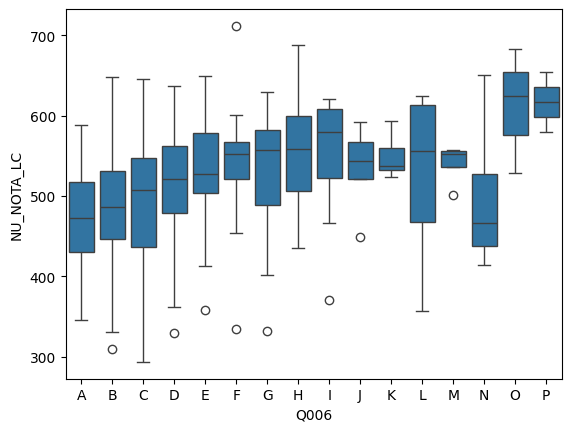

In [146]:
sns.boxplot(x="Q006", y="NU_NOTA_LC", data=dfJan, order=dfJan['Q006'].cat.categories)

for i in rendas:
    print(i)

### Teófilo Otoni

#### Cor

0 = Não declarado
1 = Branca
2 = Preta
3 = Parda
4 = Amarela
5 = Indígena


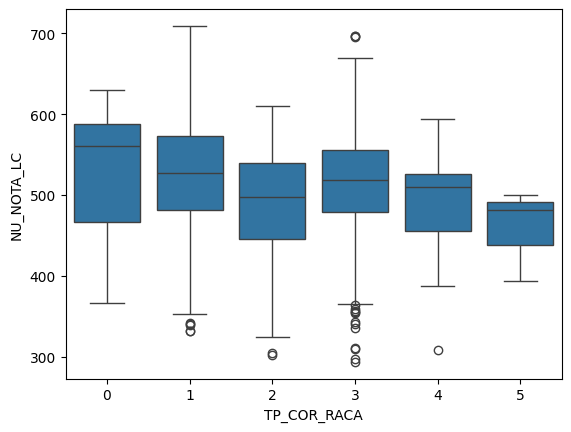

In [147]:
sns.boxplot(x="TP_COR_RACA", y="NU_NOTA_LC", data=dfTO)
for i in cores:
    print(i)

#### Sexo

<Axes: xlabel='TP_SEXO', ylabel='NU_NOTA_LC'>

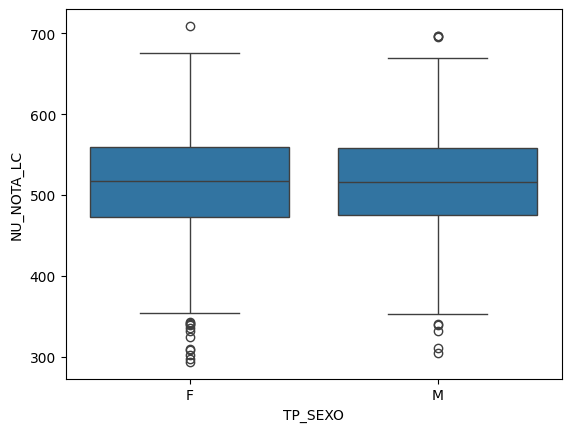

In [148]:
sns.boxplot(x="TP_SEXO", y="NU_NOTA_LC", data=dfTO)

#### Dependência Administrativa

1 = Federal
2 = Estadual
3 = Municipal
4 = Privada


<Axes: xlabel='TP_DEPENDENCIA_ADM_ESC', ylabel='NU_NOTA_LC'>

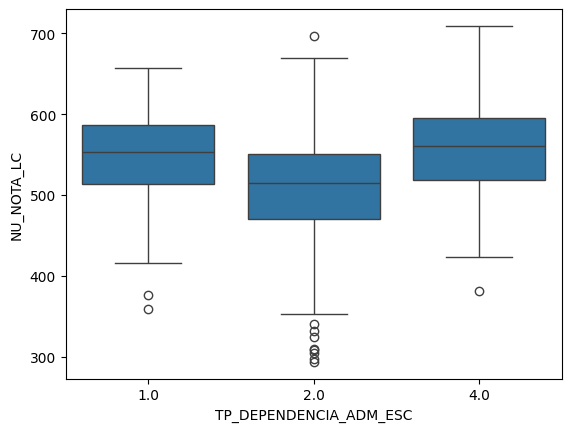

In [149]:
for i in dependencias:
    print(i)
sns.boxplot(x="TP_DEPENDENCIA_ADM_ESC", y="NU_NOTA_LC", data=dfTO)

#### Escolaridade da Mãe

A = Nunca estudou
B = Não completou a 4ª série/5º ano do Ensino Fundamental
C = Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental
D = Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio
E = Completou o Ensino Médio, mas não completou a Faculdade
F = Completou a Faculdade, mas não completou a Pós-graduação
G = Completou a Pós-graduação
H = Não sei


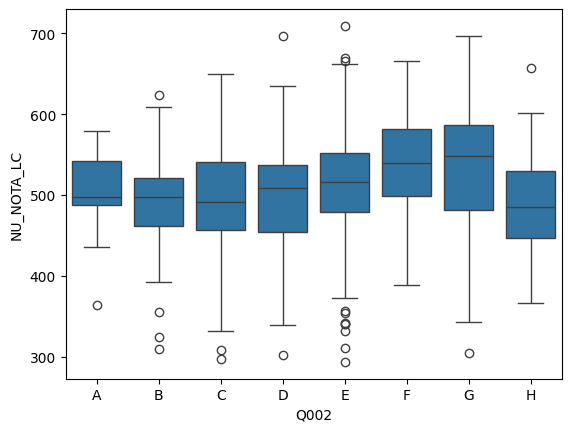

In [150]:
sns.boxplot(x="Q002", y="NU_NOTA_LC", data=dfTO, order=dfTO['Q002'].cat.categories)

for i in escolaridades:
    print(i)

#### Renda Familiar

A = Nenhuma Renda
B = Até R$ 1.320,00
C = De R$ 1.320,01 até R$ 1.980,00
D = De R$ 1.980,01 até R$ 2.640,00
E = De R$ 2.640,01 até R$ 3.300,00
F = De R$ 3.300,01 até R$ 3.960,00
G = De R$ 3.960,01 até R$ 5.280,00
H = De R$ 5.280,01 até R$ 6.600,00
I = De R$ 6.600,01 até R$ 7.920,00
J = De R$ 7.920,01 até R$ 9240,00
K = De R$ 9.240,01 até R$ 10.560,00
L = De R$ 10.560,01 até R$ 11.880,00
M = De R$ 11.880,01 até R$ 13.200,00
N = De R$ 13.200,01 até R$ 15.840,00
O = De R$ 15.840,01 até R$19.800,00
P = De R$ 19.800,01 até R$ 26.400,00
Q = Acima de R$ 26.400,00


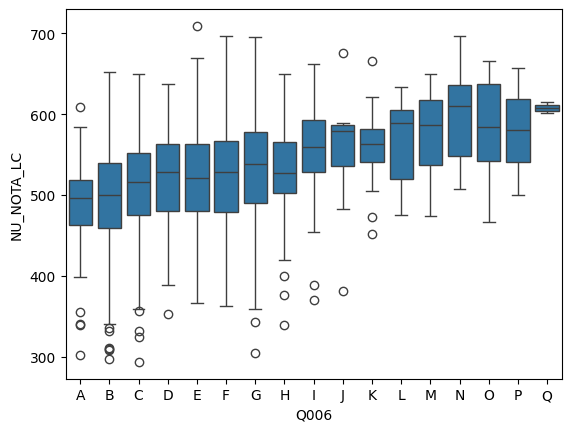

In [151]:
sns.boxplot(x="Q006", y="NU_NOTA_LC", data=dfTO, order=dfTO['Q006'].cat.categories)

for i in rendas:
    print(i)

### Unaí

#### Cor

0 = Não declarado
1 = Branca
2 = Preta
3 = Parda
4 = Amarela
5 = Indígena


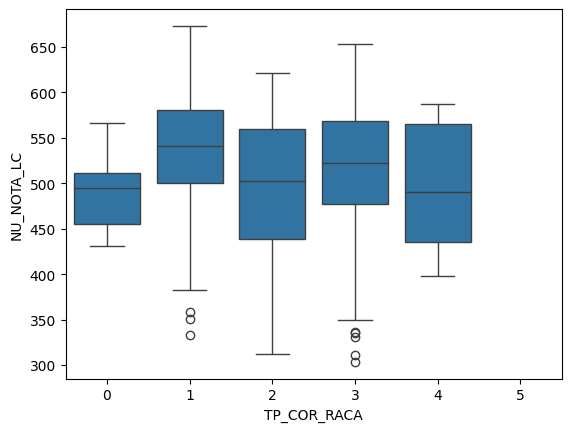

In [152]:
sns.boxplot(x="TP_COR_RACA", y="NU_NOTA_LC", data=dfUnai)
for i in cores:
    print(i)

#### Sexo

<Axes: xlabel='TP_SEXO', ylabel='NU_NOTA_LC'>

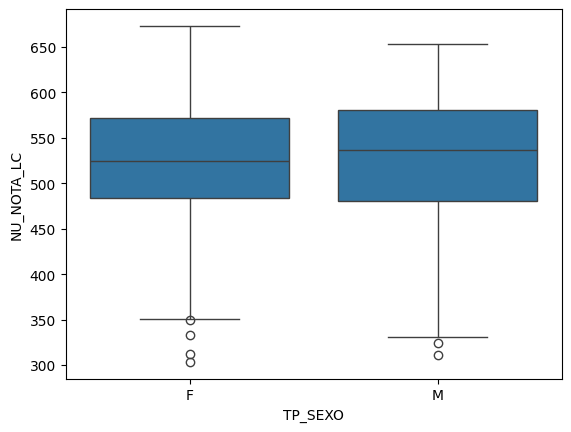

In [153]:
sns.boxplot(x="TP_SEXO", y="NU_NOTA_LC", data=dfUnai)

#### Dependência Administrativa

1 = Federal
2 = Estadual
3 = Municipal
4 = Privada


<Axes: xlabel='TP_DEPENDENCIA_ADM_ESC', ylabel='NU_NOTA_LC'>

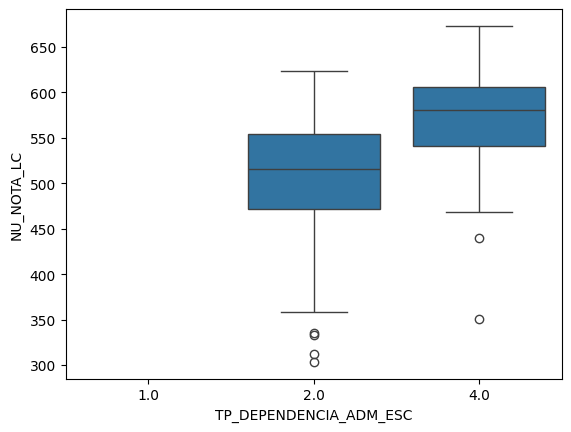

In [154]:
for i in dependencias:
    print(i)
sns.boxplot(x="TP_DEPENDENCIA_ADM_ESC", y="NU_NOTA_LC", data=dfUnai)

#### Escolaridade da Mãe

A = Nunca estudou
B = Não completou a 4ª série/5º ano do Ensino Fundamental
C = Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental
D = Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio
E = Completou o Ensino Médio, mas não completou a Faculdade
F = Completou a Faculdade, mas não completou a Pós-graduação
G = Completou a Pós-graduação
H = Não sei


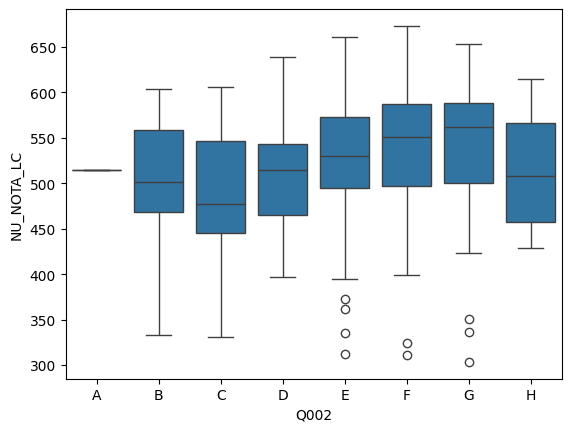

In [155]:
sns.boxplot(x="Q002", y="NU_NOTA_LC", data=dfUnai, order=dfUnai['Q002'].cat.categories)

for i in escolaridades:
    print(i)

#### Renda Familiar

A = Nenhuma Renda
B = Até R$ 1.320,00
C = De R$ 1.320,01 até R$ 1.980,00
D = De R$ 1.980,01 até R$ 2.640,00
E = De R$ 2.640,01 até R$ 3.300,00
F = De R$ 3.300,01 até R$ 3.960,00
G = De R$ 3.960,01 até R$ 5.280,00
H = De R$ 5.280,01 até R$ 6.600,00
I = De R$ 6.600,01 até R$ 7.920,00
J = De R$ 7.920,01 até R$ 9240,00
K = De R$ 9.240,01 até R$ 10.560,00
L = De R$ 10.560,01 até R$ 11.880,00
M = De R$ 11.880,01 até R$ 13.200,00
N = De R$ 13.200,01 até R$ 15.840,00
O = De R$ 15.840,01 até R$19.800,00
P = De R$ 19.800,01 até R$ 26.400,00
Q = Acima de R$ 26.400,00


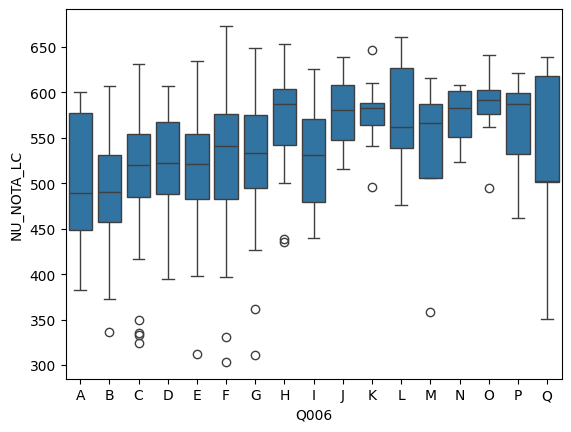

In [156]:
sns.boxplot(x="Q006", y="NU_NOTA_LC", data=dfUnai, order=dfUnai['Q006'].cat.categories)

for i in rendas:
    print(i)

# Análise para o Banner

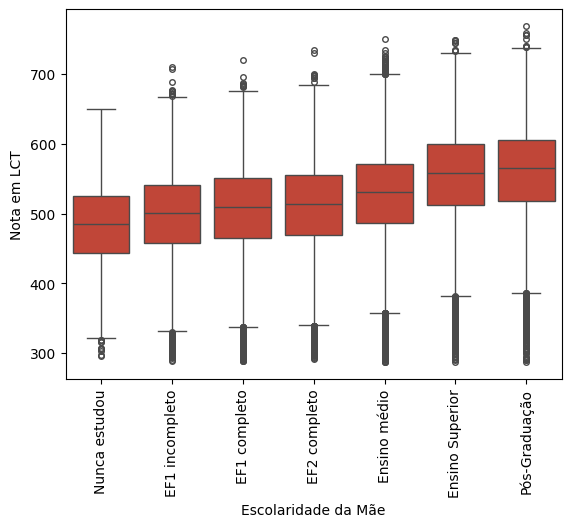

A = Nunca estudou
B = Não completou a 4ª série/5º ano do Ensino Fundamental
C = Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental
D = Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio
E = Completou o Ensino Médio, mas não completou a Faculdade
F = Completou a Faculdade, mas não completou a Pós-graduação
G = Completou a Pós-graduação
H = Não sei


In [157]:
filtro_NaoSei = dfMG["Q002"] == "H"
dfSemNS = dfMG.drop(index=dfMG[filtro_NaoSei].index)

escolaridadesMae = ["Nunca estudou",
"EF1 incompleto",
"EF1 completo",
"EF2 completo",
"Ensino médio",
"Ensino Superior",
"Pós-Graduação","H"]

def convEscString(letra):
    letras = ["A","B","C","D","E","F","G","H"]
    indice = letras.index(letra)
    return escolaridadesMae[indice]

dfSemNS["Q002"] = dfSemNS["Q002"].apply(convEscString)

sns.boxplot(x="Q002", y="NU_NOTA_LC",color="#D73421", data=dfSemNS, order=dfSemNS['Q002'].cat.categories[:-1], fliersize=4)
plt.xticks(rotation=90)
plt.xlabel('Escolaridade da Mãe')
plt.ylabel('Nota em LCT')
plt.show()

for i in escolaridades:
    print(i)

In [158]:
rendas = ["Nenhuma Renda",
"Menos de 1320,00",
"1.320,01 a 1.980,00",
"1.980,01 a 2.640,00",
"2.640,01 a 3.300,00",
"3.300,01 a 3.960,00",
"3.960,01 a 5.280,00",
"5.280,01 a 6.600,00",
"6.600,01 a 7.920,00",
"7.920,01 a 9240,00",
"9.240,01 a 10.560,00",
"10.560,01 a 11.880,00",
"11.880,01 a 13.200,00",
"13.200,01 a 15.840,00",
"15.840,01 a 9.800,00",
"19.800,01 a 26.400,00",
"Mais de 26.400,00"]

def convEscString(letra):
    letras = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q"]
    indice = letras.index(letra)
    return rendas[indice]

dfMG["Q006"] = dfMG["Q006"].apply(convEscString)

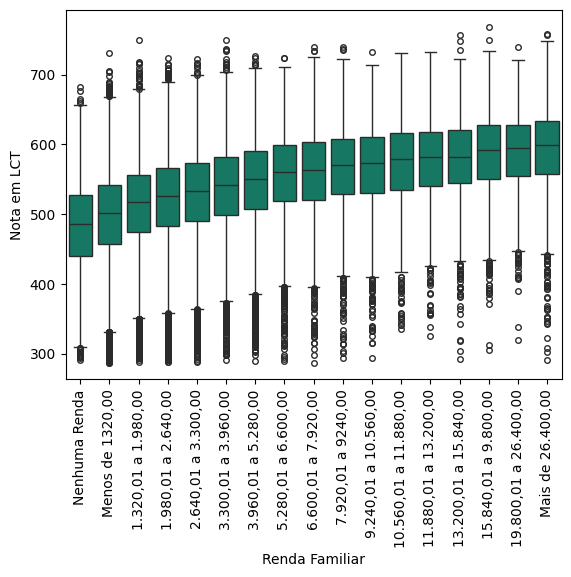

Nenhuma Renda
Menos de 1320,00
1.320,01 a 1.980,00
1.980,01 a 2.640,00
2.640,01 a 3.300,00
3.300,01 a 3.960,00
3.960,01 a 5.280,00
5.280,01 a 6.600,00
6.600,01 a 7.920,00
7.920,01 a 9240,00
9.240,01 a 10.560,00
10.560,01 a 11.880,00
11.880,01 a 13.200,00
13.200,01 a 15.840,00
15.840,01 a 9.800,00
19.800,01 a 26.400,00
Mais de 26.400,00


In [159]:
sns.boxplot(x="Q006", y="NU_NOTA_LC",color="#06886C", data=dfMG, order=dfMG['Q006'].cat.categories,  fliersize=4)

plt.xticks(rotation=90)
plt.xlabel('Renda Familiar')
plt.ylabel('Nota em LCT')
plt.show()

for i in rendas:
    print(i)

Text(0, 0.5, 'Nota em LCT')

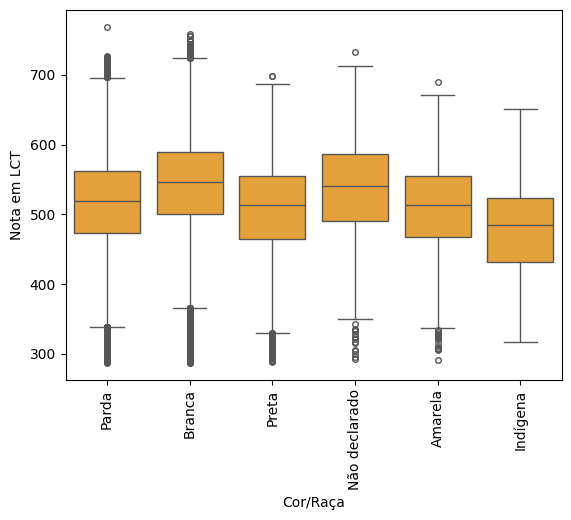

In [160]:
cores = ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena', 'Não dispõe']

def converterCor(num):
    return cores[num]

dfMG_CorConv = dfMG.copy()

dfMG_CorConv['TP_COR_RACA'] = dfMG['TP_COR_RACA'].map(converterCor)
sns.boxplot(x="TP_COR_RACA", y="NU_NOTA_LC",color="#FFA51F", data=dfMG_CorConv, fliersize=4)

plt.xticks(rotation=90)
plt.xlabel('Cor/Raça')
plt.ylabel('Nota em LCT')

Text(0, 0.5, 'Nota em LCT')

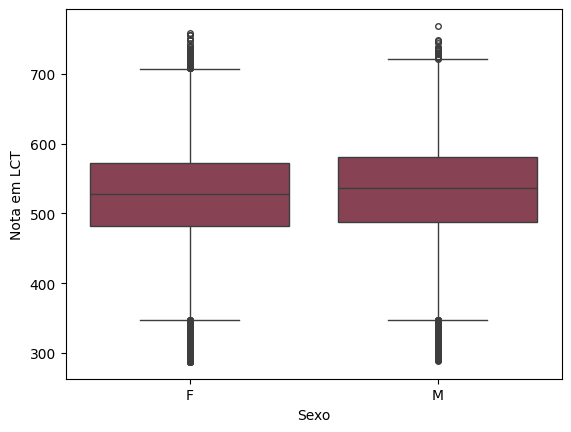

In [161]:
sns.boxplot(x="TP_SEXO", y="NU_NOTA_LC",color="#93374E", data=dfMG, fliersize=4)
plt.xlabel('Sexo')
plt.ylabel('Nota em LCT')

In [162]:
grupoSexo = dfMG.groupby("TP_SEXO")
grupoSexo['NU_NOTA_LC'].describe()

,count,mean,std,min,25%,50%,75%,max
TP_SEXO,,,,,,,,
F,53887.0,525.394925,68.366321,287.2,482.1,528.4,572.3,758.6
M,34444.0,530.693340,71.704032,289.2,487.1,536.7,580.7,768.9


In [163]:
grupoCor = dfMG_CorConv.groupby("TP_COR_RACA")
grupoCor['NU_NOTA_LC'].describe()

,count,mean,std,min,25%,50%,75%,max
TP_COR_RACA,,,,,,,,
Amarela,884.0,508.487783,67.037600,291.4,467.50,513.65,555.550,690.1
Branca,43028.0,542.167935,68.336741,287.2,500.00,546.90,589.700,758.6
Indígena,194.0,480.112371,62.269942,316.9,431.15,484.55,523.525,650.4
Não declarado,802.0,535.518454,74.428925,292.7,490.70,541.00,586.075,733.3
Parda,33244.0,515.065615,68.206120,287.2,472.60,519.10,562.000,768.9
Preta,10179.0,507.690706,66.938223,288.6,465.15,512.90,555.300,698.3


In [164]:
grupoDepAdm = dfMG.groupby("TP_DEPENDENCIA_ADM_ESC")
grupoDepAdm['NU_NOTA_LC'].describe()

,count,mean,std,min,25%,50%,75%,max
TP_DEPENDENCIA_ADM_ESC,,,,,,,,
1.0,5785.0,562.560000,61.889535,291.4,527.9,568.6,604.5,750.0
2.0,29934.0,513.190339,65.955808,287.2,472.9,518.5,559.7,736.6
3.0,481.0,534.907484,64.001734,288.6,500.4,540.4,578.0,694.4
4.0,18520.0,572.668699,62.134415,287.2,536.7,578.5,615.0,768.9
